In [14]:
import os
import sys
import json
import random
import librosa
import yt_dlp
import numpy as np

In [17]:
DIRECTIONS = ["left", "down", "up", "right"]

def download_audio(youtube_url, output_path="song.wav"):
    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': 'temp_audio.%(ext)s',
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'wav',
            'preferredquality': '192',
        }],
        'quiet': True
    }
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        print("Downloading audio...")
        ydl.download([youtube_url])
    os.rename("temp_audio.wav", output_path)
    return output_path

def save_steps_json(song_title, tempo, steps, output_file="static/output_steps.json"):
    data = {
        "song": song_title,
        "bpm": round(tempo, 2),
        "arrows": steps
    }
    with open(output_file, "w") as f:
        json.dump(data, f, indent=2)
    print(f"Saved step file to {output_file}")


In [ ]:
song_file = "test_song.wav"
download_audio('https://www.youtube.com/watch?v=Flc76dRcIdQ', song_file)

'test_song.wav'

In [23]:
save_steps_json('Gabriela', 143, steps, output_file="static/output_steps.json")

Saved step file to static/output_steps.json


# Test

In [ ]:
# https://www.youtube.com/watch?v=Flc76dRcIdQ

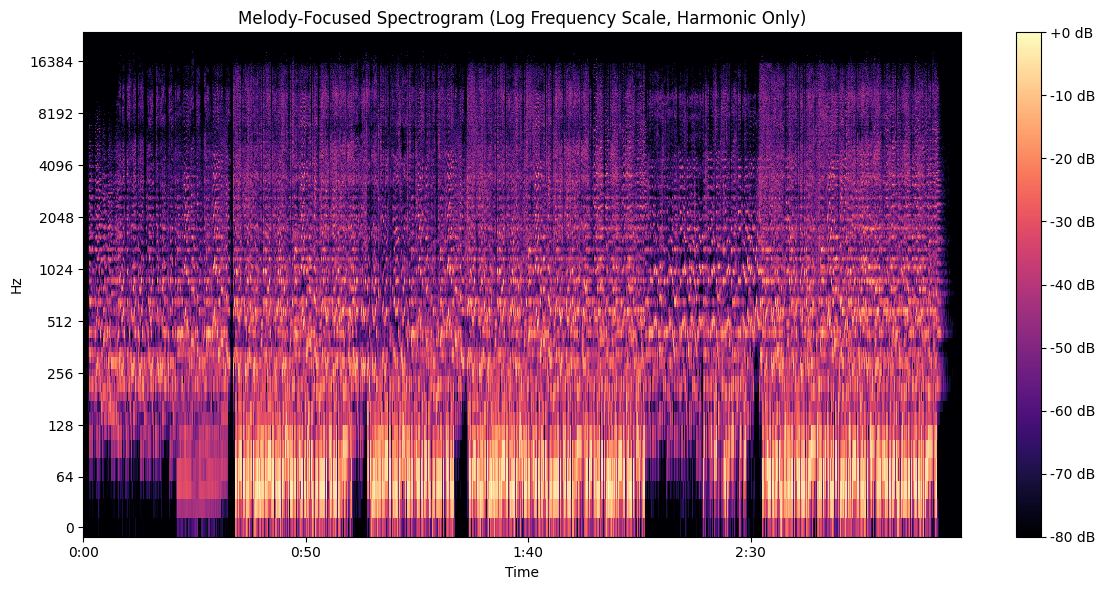

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

y, sr = librosa.load("test_song.mp3", sr=None)

y_harmonic, y_percussive = librosa.effects.hpss(y)

S = librosa.stft(y_harmonic)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Melody-Focused Spectrogram (Log Frequency Scale, Harmonic Only)')
plt.tight_layout()
plt.show()
